# 자연어 처리와 텍스트 데이터 활용<br> - Word Cloud, Word Embedding

## 워드 클라우드 그리기 예제

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.polynomial.polynomial import polyfit

# define random jitter
def rjitt(arr):
    stdev = .01*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

# custom min max scaler
def mnmx_scl(vec):
    vec = (vec-vec.min())/(vec.max()-vec.min())
    return(vec)


# to set data path
dataPath = 'https://raw.githubusercontent.com/stillxyxon/py_ml_analysis/master/'


# local data path
# localdataPath = 'C:/YONG/m1710/myPydata/'

In [2]:
# 미리 wordcloud 설치 필요
# pip install wordcloud

In [3]:
# ! pip install wordcloud

<class 'dict'>
dict_values([1.0, 0.9, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.2, 0.2, 0.2, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
{'Python': 1.0, 'wordcloud': 0.9, 'https': 0.4, 'word_cloud': 0.4, 'word cloud': 0.4, 'Generating': 0.3, 'amueller': 0.3, 'github': 0.3, 'DataCamp': 0.2, 'little': 0.2, 'generator': 0.2, 'py': 0.2, 'GeeksforGeeks': 0.2, 'article': 0.1, 'community': 0.1, 'tutorials': 0.1, 'Aug': 0.1, 'Learn': 0.1, 'perform': 0.1, 'Exploratory': 0.1, 'Data': 0.1, 'Analysis': 0.1, 'Natural': 0.1, 'Language': 0.1, 'Processing': 0.1, 'using': 0.1, 'Read': 0.1, 'blog': 0.1, 'post': 0.1, 'website': 0.1, 'code': 0.1, 'tested': 0.1, 'Simple': 0.1, 'Masked': 0.1, 'README': 0.1, 'md': 0.1, 'documentation': 0.1, 'post34': 0.1, 'io': 0.1, 'find': 0.1, 'instructions': 0.1, 'create': 0.1, 'project': 0.1, 'Compared': 0.1, 'algorithm': 0.1, 'advantage': 0.1, '

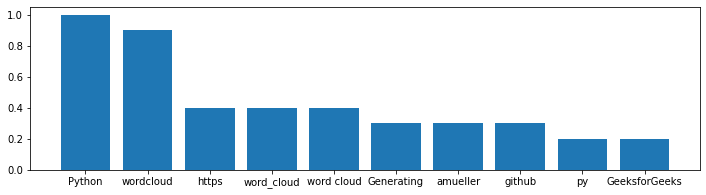

In [4]:
from wordcloud import WordCloud

# test_text.txt 파일에는 구글에서 python word cloud라고 검색해서 나온 내용들을 
# 연습용으로 저장

# 로컬에서 여는 경우
# text = open(localdataPath + 'test_text.txt').read()


from urllib.request import urlopen

# 원격에서 인터넷상의 파일을 여는 경우
path_url = "https://raw.githubusercontent.com/stillxyxon/py_ml_analysis/master/"

import urllib3

http = urllib3.PoolManager()
url = path_url + 'test_text.txt'
response = http.request('GET', url)
text = response.data.decode('ANSI')


# 워드클라우드 생성
wordcloud = WordCloud().generate(text)
print(type(wordcloud.words_))
print(wordcloud.words_.values())
print(wordcloud.words_)

# word colud dictionary를 데이터프레임으로 변환
dfwcw01 = pd.DataFrame.from_dict(wordcloud.words_,orient='index').sort_values(0, ascending=False).head(10)
print(dfwcw01.head())
plt.figure(figsize=(12,3))
plt.bar(dfwcw01.index, dfwcw01[0])
plt.show()


https://raw.githubusercontent.com/stillxyxon/py_ml_analysis/master/ML_text.txt [data source : Github Path]

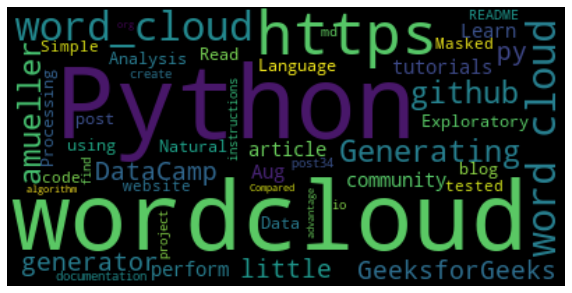

In [5]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [6]:
##  to check out .... for more
# https://www.datacamp.com/community/tutorials/wordcloud-python 
# https://pinkwink.kr/1029  한글 활용 내용 포함 (마스크 활용 포함)
# https://amueller.github.io/word_cloud/auto_examples/a_new_hope.html

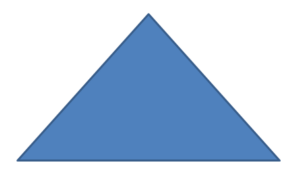

<class 'dict'>


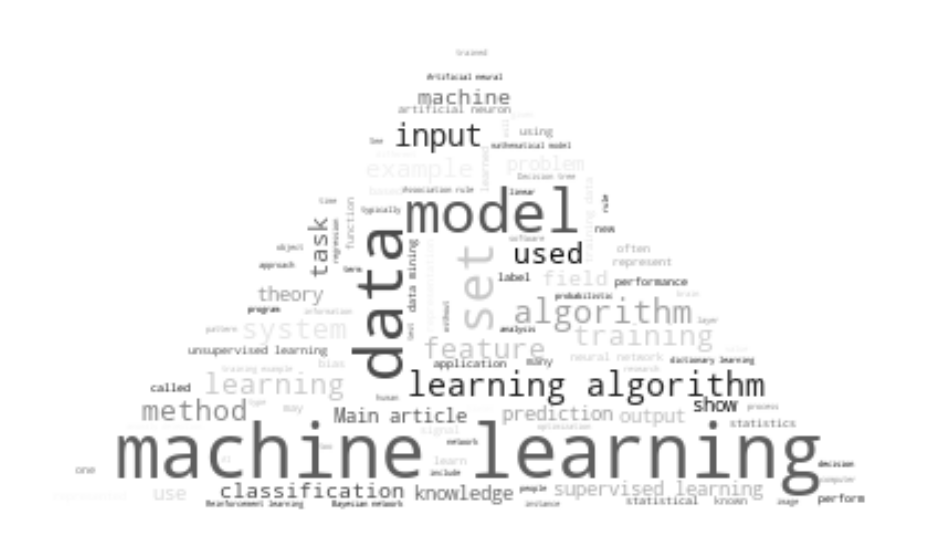

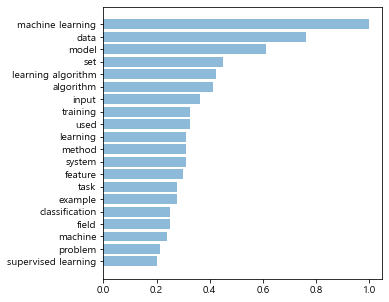

In [17]:
from wordcloud import WordCloud
from PIL import Image
import random

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(1, 100)



# test_text.txt 파일에는 구글에서 [machine learning] 을 검색해서 나온 내용들을 
# 연습용으로 저장
# text = open(locadataPath + 'ML_text.txt').read()

# 원격에서 인터넷상의 파일을 여는 경우
path_url = "https://raw.githubusercontent.com/stillxyxon/py_ml_analysis/master/"

import urllib3

http = urllib3.PoolManager()
url = path_url + 'ML_text.txt'
response = http.request('GET', url)
text = response.data.decode('ANSI')



# 마스크 용으로 사용할 이미지 파일 불러오기
url = 'https://raw.githubusercontent.com/stillxyxon/py_ml_analysis/master/triangle.png'
# url = 'https://raw.githubusercontent.com/stillxyxon/py_ml_analysis/master/circle.png'
# url = 'https://raw.githubusercontent.com/stillxyxon/py_ml_analysis/master/human_head.jpg'

from PIL import Image
from skimage import io

img = io.imread(url) # returns np array
ML_mask = img

    
# 화면에 마스크용 이미지 출력해 확인
plt.figure(figsize=(5,5))
plt.imshow(ML_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

# alternatively
# io.imshow(img) # 이미지를 화면 출력


wordcloud = WordCloud(max_font_size=200, max_words=3000, mask=ML_mask, 
                      background_color="white").generate(text)
print(type(wordcloud.words_))
wordcloud.words_.values()


# 화면에 워드클라우드 출력
plt.figure(figsize=(20,10)) # 선명하게 하기 위해 사이즈 조절
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
plt.axis("off")
plt.show()


# word colud dictionary를 데이터프레임으로 변환
dfwcw01 = pd.DataFrame.from_dict(wordcloud.words_,orient='index').sort_values(0).tail(20)
# 오름차순 정렬 후 마지막 일부를 추출

plt.figure(figsize=(5,5))
plt.barh(dfwcw01.index, dfwcw01[0], alpha=0.5)
plt.show()

In [8]:
# matplotlib 에서 한글을 표시하기 위한 설정
import matplotlib

font_name = matplotlib.font_manager.FontProperties(
                fname="c:/Windows/Fonts/malgun.ttf"  # 윈도우즈의 한글 폰트 위치를 지정
            ).get_name()
matplotlib.rc('font', family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False

# Import data
# csv file import example
# 한글 데이터의 경우 미리 인코딩을 UTF-8로 변경해두면 문제 발생 방지 

<class 'dict'>


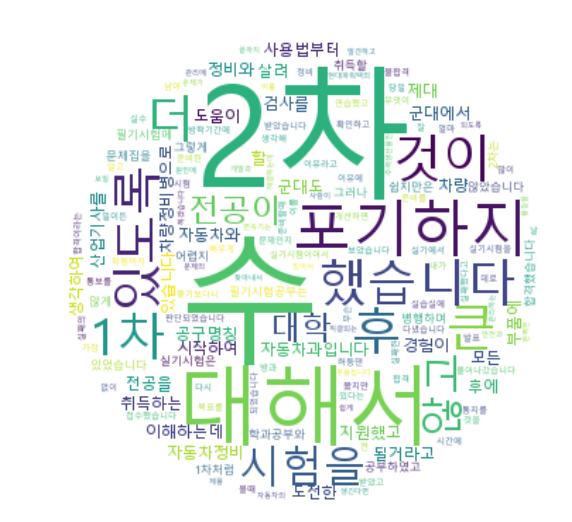

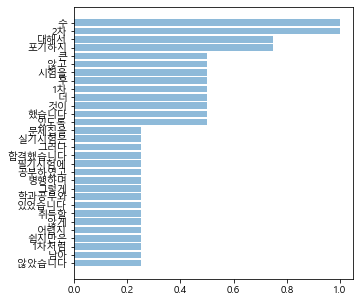

In [20]:
# 구글에서 [코로나] 를 검색해서 나온 내용들을 연습용으로

path_url = "https://raw.githubusercontent.com/stillxyxon/py_ml_analysis/master/"

import urllib3

http = urllib3.PoolManager()
url = path_url + 'corona_text.txt'
response = http.request('GET', url)
text = response.data.decode('ANSI')

# 로컬의 데이터 파일 여는 경우
# text = open(localdataPath + 'corona_text.txt').read()

text = open('C:/Users/user/YONG/SSF2020-main/SSF2020-main/sample_text.txt', encoding="utf-8").read()

# 마스크 선택 
from PIL import Image
from skimage import io

url = 'https://raw.githubusercontent.com/stillxyxon/py_ml_analysis/master/circle.png'
img = io.imread(url) # returns np array
ML_mask = img


# 한글폰트 위치 지정 필수
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
    max_font_size=100, max_words=3000, mask=ML_mask, 
    background_color="white").generate(text)
print(type(wordcloud.words_))
# wordcloud.words_.values()


plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



# word colud dictionary를 데이터프레임으로 변환
dfwcw01 = pd.DataFrame.from_dict(wordcloud.words_,orient='index').sort_values(0).tail(30)
# 오름차순 정렬 후 마지막 일부를 추출

plt.figure(figsize=(5,5))
plt.barh(dfwcw01.index, dfwcw01[0], alpha=0.5)
plt.show()

In [21]:
# 명사 형의 단어만 추출

from konlpy.tag import Okt # 오픈소스 한국어 형태소 분석기 (과거 Twitter)
from collections import Counter

data = text
okt = Okt()   
noun = okt.nouns(data)
for i,v in enumerate(noun):
    if len(v) < 2:
        noun.pop(i) # remove item
count = Counter(noun)
noun_list = count.most_common(100)
noun_list[:5]

[('시험', 8), ('자동차', 4), ('정비', 4), ('실기', 4), ('대해', 3)]

In [11]:
# ! pip install konlpy

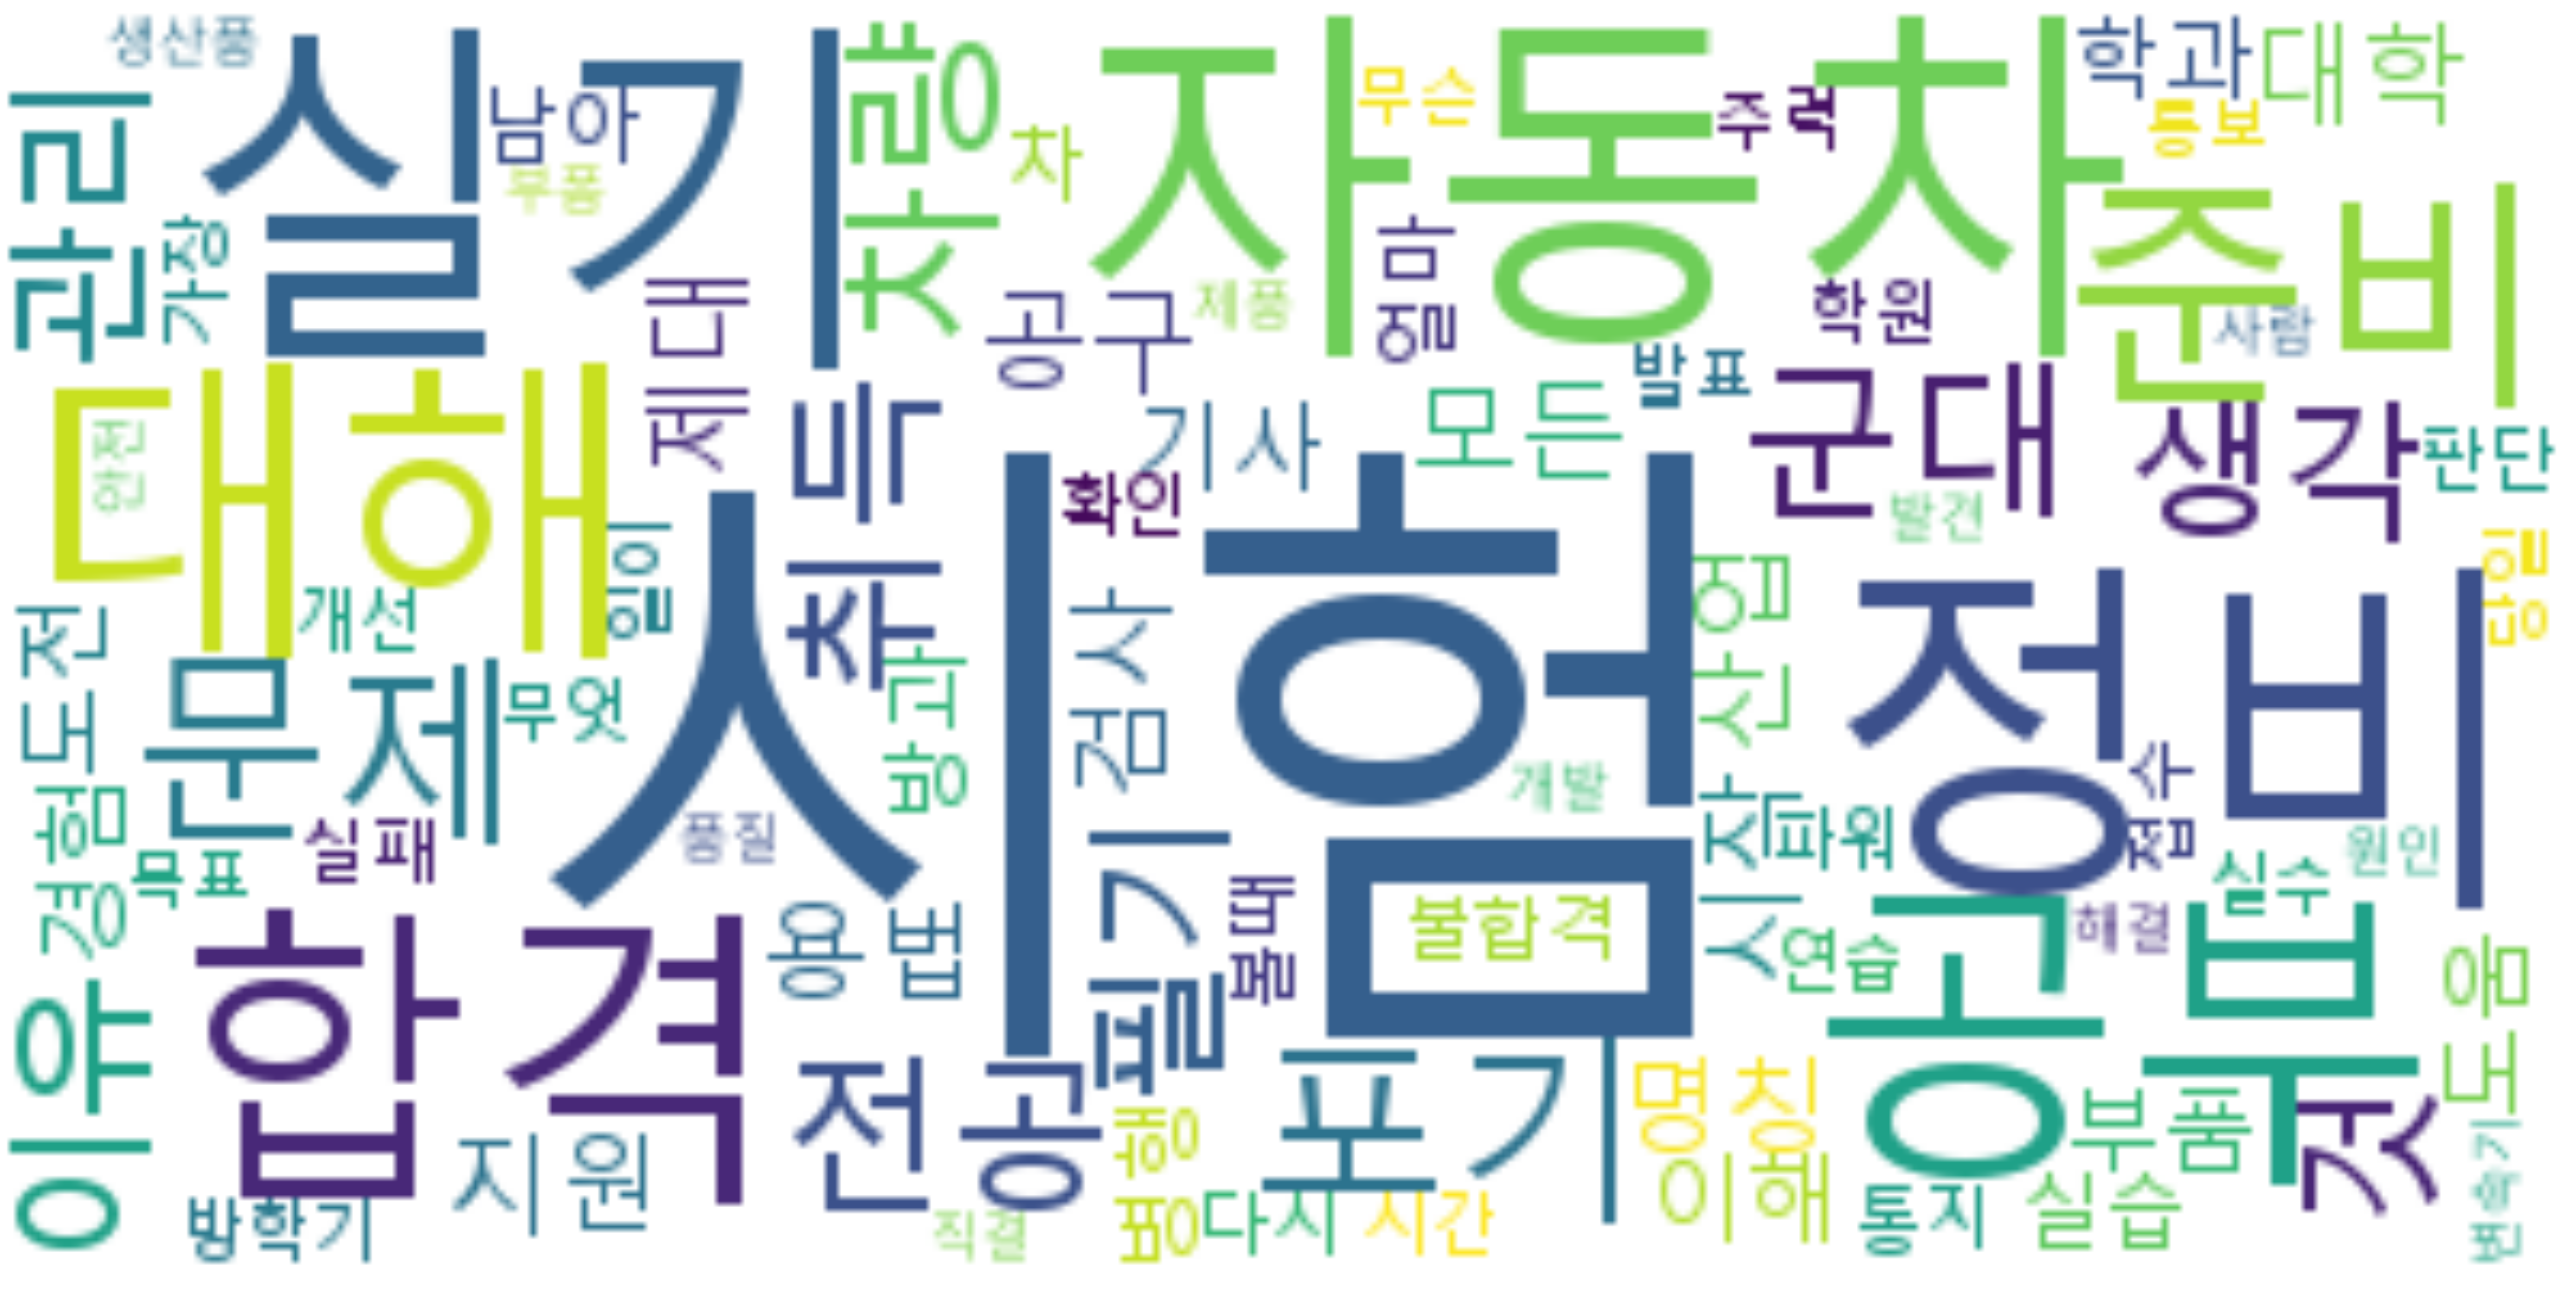

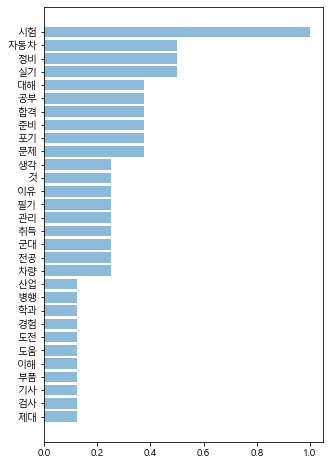

In [22]:
# 워드클라우드 생성

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      max_font_size=100, max_words=3000, 
                      # mask=ML_mask, 
                      background_color='white'
                     ).generate_from_frequencies(dict(noun_list))
# print(type(wordcloud.words_))
# wordcloud.words_.values()

plt.figure(figsize=(100,100))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



# word colud dictionary를 데이터프레임으로 변환
dfwcw01 = pd.DataFrame.from_dict(wordcloud.words_,orient='index').sort_values(0).tail(30)
# 오름차순 정렬 후 마지막 일부를 추출

plt.figure(figsize=(5,8))
plt.barh(dfwcw01.index, dfwcw01[0], alpha=0.5)
plt.show()

### Word Embedding

- 단어들에 좌표를 부여 (= 벡터화)
- Word2Vec은 입력층과 출력층 사이에 hidden layer 대신 projection layer 하나만 존재하는 shallow NN
- CBOW는 주변단어들로부터 중심단어를 추측. Skipgram은 반대로 중심단어로 주변단어를 추측하는 방식
- W2V 는 NNLM(Neural Net Language 모델)의 느린 학습속도를 개선하고 다음 단어 대신 중심단어 의미를 수치화하는 것

- 한글 설명 on W2V :  https://wikidocs.net/22660

677
<class 'pandas.core.series.Series'>
기사내용 예: 
 0                    [시시비비] 마이데이터 시대, 민간의 역할
1                        [기고]마이데이터산업의 전망과 과제
2    [혁신 주도하는 디지털금융] 보맵, 보험+대출 '마이데이터'로 비...
3                 증권사 마이데이터 '초읽기'…연내 예비허가 기대
Name: news_title, dtype: object
[['시시비비', '마이', '데이터', '시대', '민간', '역할'], ['기고', '마이', '데이터', '산업', '전망', '과제'], ['혁신', '주도하는', '디지털', '금융', '보맵', '보험', '대출', '마이', '데이터']] 677
:: W2V model created
:: 


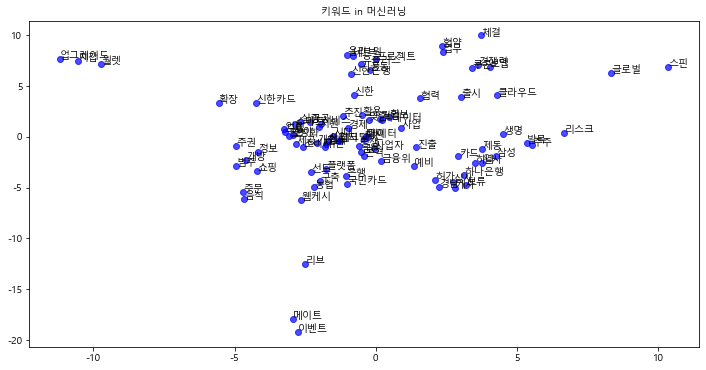

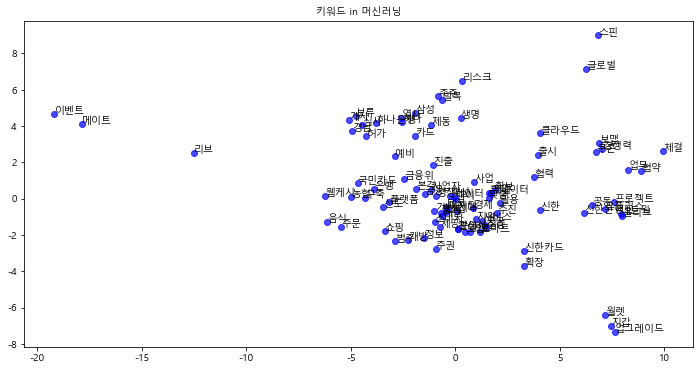

similarity between words
sim('삼성', '신한') -0.50201744


job       vec1         vec2       vec3
89  글로벌   8.338057      6.26543  7.1503534
33  리스크   6.670379   0.33784992  6.4972143
10   주주  5.5388217  -0.80166674   5.673642
16   발목   5.343506   -0.6164505   5.459904
22   생명   4.523598   0.26166004   4.425663

In [41]:
# Word2Vec using gensim 
###########################

# import tensorflow as tf
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd # pandas 데이터 입출력 
from gensim.models import Word2Vec
from gensim.models import doc2vec
from nltk.cluster import KMeansClusterer
from konlpy.tag import Okt
import nltk
import pylab


sentences = pd.read_csv(dataPath +'MLnews_sample.csv').news_title
sentences = fnNews.news_title

print(len(sentences)) # ML 관련 400건 뉴스의 타이틀 리스트
print(type(sentences))

print('기사내용 예: \n', sentences[:4])

min_count=10  # min frequency
iter=2000 # or 10000? 얼마나 큰 숫자가 적정?
# size=50  # num of dimension
size=3 
window=3  # skip gram window size - typical
sg=0 # 0 : CBOW ;  skipgram : 1

# CBOW는 중앙 단어의 앞 뒤 단어를 고려해서 중앙에 있는 단어를 추측
# Skip-Gram은 중앙에 있는 단어를 통해서 중앙 단어의 앞 뒤 단어들을 추측

twitter = Okt()
 
sentences_tag = []

sentencesa = sentences.tolist()

for sentence in sentencesa:
    morph = twitter.pos(sentence)
    sentences_tag.append(morph)
 
 
noun_adj_list = []

# 의미상 불필요한 제거 대상 단어 목록
# 제거하는 단어 리스트 구성에 따라 전체 결과가 달라짐
# 불용어 (stopword)
stopWords = ['러닝머신','기구', '런닝머신', '기구']

for sentence1 in sentences_tag:
    noun_adj_list_snt = []
    for word, tag in sentence1:
        # 명사와 형용사 두 가지 종류의 품사에 해당하는 단어만 포함
        # 한글자 길이의 단어는 무시
        if (tag in ['Noun', 'Adjective']) and (len(word)>1) and (word not in stopWords):
            noun_adj_list_snt.append(word)
    noun_adj_list.append(noun_adj_list_snt)        
print(noun_adj_list[:3] , len(noun_adj_list))

# 형태소분석기에 따라 서로 다른 결과 생성. 단어를 자르는 기준 등에 차이 -- 시행착오 불가피

w_sentences = noun_adj_list

from gensim.test.utils import common_texts, get_tmpfile
from gensim.models.callbacks import CallbackAny2Vec

class callback(CallbackAny2Vec):
    '''Callback to print loss after each epoch.'''

    def __init__(self):
        self.epoch = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        print('Loss after epoch {}: {}'.format(self.epoch, loss))
        self.epoch += 1

# simple run
model = Word2Vec(w_sentences, min_count=min_count, size=size, window=window, sg=sg,
                iter=3000)

'''
# 모델 수렴 여부를 보기 위해 training loss를 출력하는 경우

model = Word2Vec(min_count=min_count, size=size, window=window, sg=sg)
model.build_vocab(w_sentences)
model.train(w_sentences,
            total_examples=model.corpus_count,
            epochs=iter,
            compute_loss=True, 
            report_delay=1,
            callbacks=[callback()])
'''

print(":: W2V model created")
print(":: ")


X = model[model.wv.vocab]
vocab = list(model.wv.vocab.keys())
# print('vocab = \n', vocab)


fig, ax = plt.subplots(figsize=(12,6))
pylab.title('키워드 in 머신러닝', size=10)
plt.scatter(X[:,0], X[:,1], alpha=0.7, c="blue")
x = list(X[:,0])
y = list(X[:,1])
z = vocab
for i, txt in enumerate(z):
    ax.annotate(txt, (x[i]+0.01, y[i]+0.01), size=10)
plt.show()

fig, ax = plt.subplots(figsize=(12,6))
pylab.title('키워드 in 머신러닝', size=10)
plt.scatter(X[:,1], X[:,2], alpha=0.7, c="blue")
x = list(X[:,1])
y = list(X[:,2])
z = vocab
for i, txt in enumerate(z):
    ax.annotate(txt, (x[i]+0.01, y[i]+0.01), size=10)
plt.show()

# 이미지를 파일로 Export -- 해상도 조절
# fig.savefig(localdataPath + 'fig_word2vec001.png', dpi=200)
# print("[] fig saved")

# get similarity between words
print("similarity between words")

# print("sim('머신', '러닝')", model.wv.similarity('머신', '러닝'))
# print("sim('데이터', '러닝')", model.wv.similarity('데이터', '러닝'))
print("sim('삼성', '신한')", model.wv.similarity('삼성', '신한'))


# 데이터프레임에 벡터 생성 결과 저장
df_senvoc = pd.DataFrame(np.column_stack([z, X[:,0], X[:,1], X[:,2]]),
     columns=["job","vec1","vec2","vec3"]) 
df_senvoc.sort_values('vec1', ascending=False)[:5]

In [40]:
# print("sim('증권', '머신')", model.wv.similarity('데이터', '러닝'))

In [14]:
# !pip install gensim

  Created wheel for smart-open: filename=smart_open-4.0.1-py3-none-any.whl size=108251 sha256=51b679bf2a58554e6b54572a0ebe6e26186c402095e7649b6f3397f2de4ee9bd
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\8c\f9\f4\4ddd9ddee3488f48be20e9bf3108961f03ae23da29b7ed26d1
Successfully built smart-open
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [29]:
# check out std of each diemnsion
# 변동이 더 큰 dimension이라면 중요도가 클 것으로 기대

df_senvoc_cv = df_senvoc[df_senvoc.columns[1:]].apply(pd.to_numeric).apply(mnmx_scl)
display(df_senvoc_cv.std() / df_senvoc_cv.mean())

# dimension별 차이가 있으나 ... 그리 크지는 않음

print('correlation between dimensions:')
df_senvoc_cv.corr()

vec1    0.476746
vec2    0.593194
vec3    0.578514
dtype: float64

correlation between dimensions:


vec1      vec2      vec3
vec1  1.00000 -0.376940  0.553670
vec2 -0.37694  1.000000  0.481574
vec3  0.55367  0.481574  1.000000

- Word Embedding을 어디에 활용할 것인가? -- Map 자체로서도 가치있지만 단어(or Entity)를 수치화시켜 다른 모델 개발시 변수로 투입 가능
> 예1: 주식시장에서 종목별 관련뉴스로 부터 종목의 특성 수치화<br>
> 예2: 신용카드 가맹점에 대한 소셜 멘션으로 부터 가맹점 특성 수치화<br>
> 예3: 고객 클레임으로 부터 고객의 태도 수치화 또는 클레임의 유형 자동분류

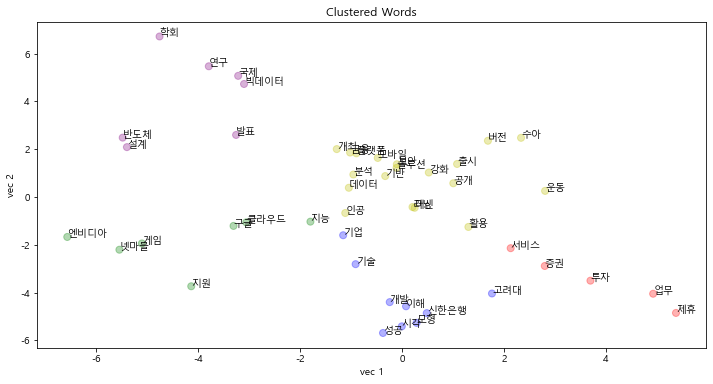

In [30]:
# Word Embedding Map에 클러스터링 적용

from sklearn.cluster import KMeans  

df_senvoc_cl = df_senvoc[df_senvoc.columns[1:]].apply(pd.to_numeric).copy()

# create k-means model
kmm1 = KMeans(n_clusters=5, random_state=11)  
kmm1.fit(df_senvoc_cl)  

df_senvoc_cl['clst'] = kmm1.labels_

colorlist = ['r', 'y', 'g', 'blue','purple']
colors1 = [colorlist[i] for i in  df_senvoc_cl['clst']]
plt.figure(figsize=(12,6))
plt.scatter(df_senvoc_cl.vec1, df_senvoc_cl.vec2,
           color=colors1, alpha=0.3, s=50)
plt.xlabel('vec 1')
plt.ylabel('vec 2')
plt.title('Clustered Words')

x = df_senvoc_cl.vec1
y = df_senvoc_cl.vec2
z = df_senvoc.job

for i in z.index:
    plt.text(x[i]+0.001, y[i]+0.001, z[i], size=10)
plt.show()


[응용 연습용 문제]
- 각 단어의 좌표를 평균하여 각 기사의 평균적 좌표를 구하고 그 것을 사용해서 각 기사를 분류해본다면?

In [31]:
import sys

# Warning 메시지가 표시되는 것을 보기 싫다면 설정
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

    
vec1sum = []
vec2sum = []
vec3sum = []

i=0
for x in noun_adj_list:
    # print(x)
    vec1list = np.array([df_senvoc[df_senvoc.job==z]['vec1'].values.astype(float).sum().astype(float) if z in df_senvoc.job.unique() else np.NaN for z in x])
    vec1sum.append(np.nanmean(vec1list))
    vec2list = np.array([df_senvoc[df_senvoc.job==z]['vec2'].values.astype(float).sum().astype(float) if z in df_senvoc.job.unique() else np.NaN for z in x])
    vec2sum.append(np.nanmean(vec2list))
    vec3list = np.array([df_senvoc[df_senvoc.job==z]['vec3'].values.astype(float).sum().astype(float) if z in df_senvoc.job.unique() else np.NaN for z in x])
    vec3sum.append(np.nanmean(vec3list))

    # 각 단어에 대응되는 값이 있으면 사용 아니면 NaN
    

sentences_cl = pd.DataFrame(sentences.copy())
sentences_cl['vec1mean']= vec1sum    
sentences_cl['vec2mean']= vec2sum    
sentences_cl['vec3mean']= vec3sum    

# na 없는 즉 좌표값이 정상적인 (=분류 의미 있는) 기사만 추출
sentences_cl = sentences_cl[~sentences_cl.isnull().any(axis=1)].sort_values(by='vec1mean')
display(sentences_cl.head())
sentences_cl.tail()


news_title  vec1mean  vec2mean  vec3mean
271           엔비디아 T4 GPU 탑재한 아마존..최고 AI 성능 도전 -6.572156 -1.674797 -2.439054
189                      반도체 설계툴 효율과 정확성 높일 AI -5.441962  2.283958 -0.120548
193                      반도체 설계툴 효율과 정확성 높일 AI -5.441962  2.283958 -0.120548
278  멘토 IC EDA 부문 수석 부사장 "반도체 설계 산업이 지속 성장할 것" -5.441962  2.283958 -0.120548
282  멘토 IC EDA 부문 수석 부사장 "반도체 설계 산업이 지속 성장할 것" -5.441962  2.283958 -0.120548

news_title  vec1mean  vec2mean  \
269  [운동법] '헬스장에서 의미 없는 시간만 보낸다면'… 런닝머신만 뛸 줄 알아, 운동...  2.811415  0.253220   
172           함소원 “2007년부터 매일 운동, 출산 하루 전까지 러닝머신” (비스)  2.811415  0.253220   
19   [몸매가꾸기] '헬스장에서 어떤 운동 할 지 모르겠다면'… 런닝머신만 하면 소용없어...  2.811415  0.253220   
254            함소원 "몸매 비결? 2007년부터 매일 운동…출산 전날에도 러닝머신"  2.811415  0.253220   
20                            미래·삼성證 등 주식투자도 AI시대 `성큼`  3.701946 -3.504751   

     vec3mean  
269  3.835292  
172  3.835292  
19   3.835292  
254  3.835292  
20   2.981202

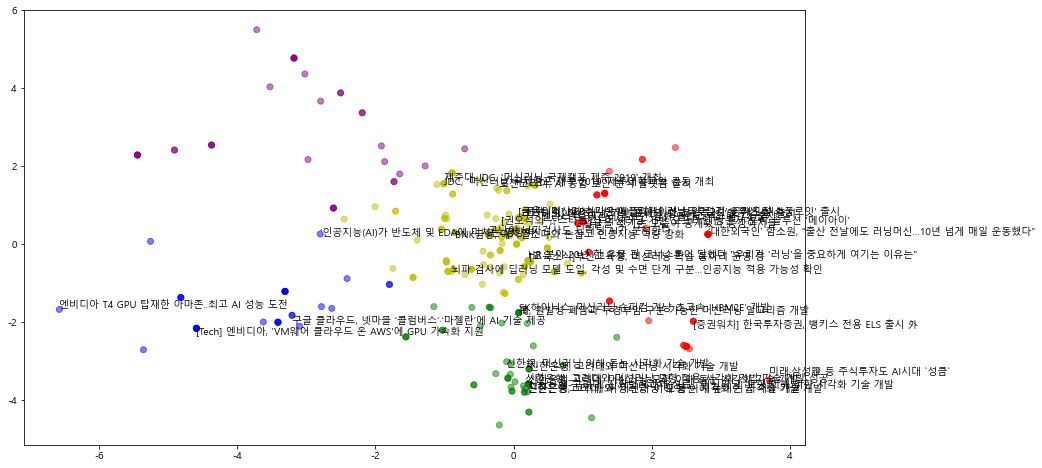

In [33]:
# 무작위 표본 추출 함수를 사용해서 소수의 일부 기사만 제목 표시

import random

selectindex = random.sample(list(sentences_cl.index), 30)
sentences_cl['tmp_title'] = ''
sentences_cl['tmp_title'] = [sentences_cl.news_title[x] if x in selectindex else '' for x in sentences_cl.index]


# 키워드가 아닌 기사 단위 클러스터링으로 색상 구분 표시

from sklearn.cluster import KMeans  

# create k-means model
kmm2 = KMeans(n_clusters=5, random_state=11)  
kmm2.fit(sentences_cl[sentences_cl.columns[1:4]])  

sentences_cl['clst'] = kmm2.labels_

colorlist = ['r', 'y', 'g', 'blue','purple']
colors1 = [colorlist[i] for i in  sentences_cl['clst']]


plt.figure(figsize=(14,8))
plt.scatter(sentences_cl.vec1mean, sentences_cl.vec2mean,
           color=colors1, alpha=0.5)

x = sentences_cl.vec1mean
y = rjitt(sentences_cl.vec2mean)
z = sentences_cl.tmp_title

for i in z.index:
    plt.text(x[i]-0.001, y[i]+0.001, z[i], size=10)
plt.show()    


[뉴스기사 클러스터링 결과] 
- 제목이 동일하지 않아도 의미나 단어가 유사한 것들이 유사한 영역에 묶임→ 의미 기반의 기사 분류
- 주의사항의 예: 러닝머신 == 머신러닝?

[기사 수집용 크롤링 임시]

In [34]:
#  임시 크롤링 스크립트 

import requests
from bs4 import BeautifulSoup


# 접속할 사이트(웹 서버) 주소


def get_link(p_url):
    html = requests.get(p_url).text.strip() # 요청의 결과(응답, response - HTML)를 저장
    # print(html[0:100]) # 전체 문자열에서 100자만 확인

    # BeautifulSoup 객체를 생성
    soup = BeautifulSoup(html, 'html5lib')

    # soup.select(css_selector): soup 객체에서 CSS 선택자로 요소들을 찾는 방법
    r_news_link = soup.select('.coll_cont ul li a.f_link_b')
    return r_news_link


In [42]:
kwd = '코로나'
kwd = '보험산업'
kwd = '마이 데이터'
# kwd = '메이저리그'
# kwd = '머신러닝'
nws_lst = []

# 사이트(웹 서버)로 요청(request)를 보냄
for page in range(1, 101):
    print('page:', page)
    url = f'https://search.daum.net/search?w=news&q='+kwd+ '&DA=PGD&spacing=0&p='+str(page)
    
    news_link = get_link(url)
    for link in news_link:
        nws_lst.append(link.text)
        # print(link.text)
        # print(link.get('href'))
    print(link.text)


fnNews = pd.DataFrame(np.array(nws_lst))



page: 1
"대주주 적격성 탓 마이데이터 발목 안돼" 금융권 반발
page: 2
핀다, 쿠콘과 협약.."마이데이터 활용 소비패턴 맞춤상품 출시할 것"
page: 3
[2021 금융IT혁신] IBM “마이데이터 대응위해선 유연한 플랫폼 ...
page: 4
삼성카드, 대주주 삼성생명 중징계로 마이데이터 사업 '차질'
page: 5
마이데이터사업 1차 예비허가 16일에 29개사 심사 결과 나온다
page: 6
쿠콘, 보맵과 마이데이터 사업 협력 MOU 체결
page: 7
하나금융 계열사, 마이데이터 사업 '대주주 리스크'에 '스톱' 위기
page: 8
'대주주 리스크' 현실로…삼성카드, 마이데이터 사업 '발등에 불'
page: 9
부천시, 마이데이터 실증 시범 서비스 추진
page: 10
삼성생명, 요양병원비 미지급 '중징계' 확정...마이데이터 신사업...
page: 11
마이데이터 사업 추진하고 있는 삼성카드, ‘대주주 리스크’에 ...
page: 12
하나금융, 마이데이터 사업 급제동
page: 13
보맵, 쿠콘과 마이데이터 사업 ‘맞손’
page: 14
마이데이터 적격성 심사 기준 논란.. 본인 적격성은 안따져
page: 15
NH농협은행-웹케시, 금융권 마이데이터 구축
page: 16
'대주주 리스크' 현실로…삼성카드, 마이데이터 사업 '발등에 불'
page: 17
부천시, 마이데이터 실증 시범 서비스 추진
page: 18
삼성생명, 요양병원비 미지급 '중징계' 확정...마이데이터 신사업...
page: 19
마이데이터 사업 추진하고 있는 삼성카드, ‘대주주 리스크’에 ...
page: 20
하나금융, 마이데이터 사업 급제동
page: 21
보맵, 쿠콘과 마이데이터 사업 ‘맞손’
page: 22
마이데이터 적격성 심사 기준 논란.. 본인 적격성은 안따져
page: 23
NH농협은행-웹케시, 금융권 마이데이터 구축
page: 24
쿠콘-보맵, 마이데이터 사업 협력 위한 업무협약 체결
page: 25
[뉴스해설]삼성카드 마이데이터 진출 발목 잡은 '삼성생

In [37]:
fnNews = pd.DataFrame(np.array(nws_lst))
fnNews.columns = ['news_title']
fnNews = fnNews.drop_duplicates()
fnNews

# localdataPath = 'C:/YONG/m1710/myPydata/'
# fnNews.to_csv(localdataPath+'insuranceindNews.csv', encoding='utf-8')
# pd.read_csv(localdataPath+'insuranceindNews.csv', index_col=0).head()

# pd.read_csv(localdataPath+'MLBnews.csv', index_col=0).head()

news_title
0                      [시시비비] 마이데이터 시대, 민간의 역할
1                          [기고]마이데이터산업의 전망과 과제
2      [혁신 주도하는 디지털금융] 보맵, 보험+대출 '마이데이터'로 비...
3                   증권사 마이데이터 '초읽기'…연내 예비허가 기대
4                 대주주 '연좌제'에.. 마이데이터 '공든 탑' 흔들
..                                         ...
795        웹케시, NH농협은행 플랫폼 'NH오픈데이터' 구축 사업자 선정
796         [첫발 뗀 마이데이터] 신청률 저조한 저축은행, 일단 관망키로
797          신한은행, 빅데이터 전문가 2명 영입…'디지털 혁신단' 신설
798  비씨카드, PG-VAN사와 '데이터 연합군' 결성…데이터 시너지 창출...
799     [특집] ‘우리’의 소중한 마이데이터...준비된 사업자 우리카드...

[677 rows x 1 columns]

[추가 연습용 데이터셋] 
- 머신러닝 관련 유튜브 영상 제목 리스트

In [ ]:
pd.read_csv(dataPath + 'ML_youtube_sample.csv').title.head()